# Discover OpenCV Feature Matching Methods

Goal of present notebook is to explore OpenCV module, and tests technics such as SIFT, SURF.


### Imported Modules


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append("../PythonSIFT")

import pysift
import visu_extrema
import dog

### Sift Overview


In [3]:
images_path = "images/"
image_name = "cor1"
image_extension = ".jpeg"
img = cv.imread(images_path + image_name + image_extension)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray, None)
img = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite(images_path + image_name + "sift_keypoints.jpg", img)

True

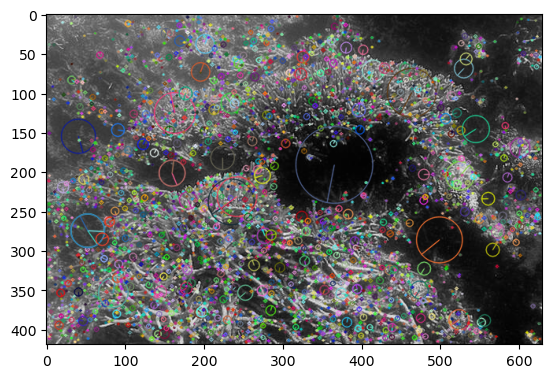

In [4]:
# display created image
plt.imshow(img)

In [5]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

In [8]:
def create_keypoints_image(
    img_path, edgeTreshold=10, contrastTreshold=0.04, sigma=1.6, big_only=True
):
    """Creates and return an image with the rich SIFT keypoints of the image in the path"""

    img = cv.imread(img_path)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # create sift object with specified parameters
    sift = cv.SIFT_create(
        edgeThreshold=edgeTreshold,
        contrastThreshold=contrastTreshold,
        sigma=sigma,
    )

    # detect keypoints
    kp = sift.detect(gray, None)

    # draw keypoints
    if big_only:
        # display only keypoints with size >= 3 and their orientation
        kp_img = cv.drawKeypoints(
            gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )
    else:
        # display all keypoints and their orientation
        kp_img = cv.drawKeypoints(gray, kp, img)

    # add text
    font = cv.FONT_HERSHEY_SIMPLEX
    color = (50, 50, 50)

    # Set font size relative to image height
    fontScale = (
        kp_img.shape[0] / 1000
    )  # Adjust the denominator to get the desired font size

    # Define position
    positions = [(10, int(m * fontScale)) for m in range(50, 201, 50)]

    # Set thickness relative to image height
    thickness = int(
        kp_img.shape[0] / 500
    )  # Adjust the denominator to get the desired thickness

    # add sift parameters
    cv.putText(
        kp_img,
        "Number of keypoints: " + str(len(kp)),
        positions[0],
        font,
        fontScale,
        color,
        thickness,
        cv.LINE_AA,
    )

    cv.putText(
        kp_img,
        "Edge threshold: " + str(edgeTreshold),
        positions[1],
        font,
        fontScale,
        color,
        thickness,
        cv.LINE_AA,
    )
    cv.putText(
        kp_img,
        "Contrast threshold: " + str(contrastTreshold),
        positions[2],
        font,
        fontScale,
        color,
        thickness,
        cv.LINE_AA,
    )
    cv.putText(
        kp_img,
        "Sigma: " + str(sigma),
        positions[3],
        font,
        fontScale,
        color,
        thickness,
        cv.LINE_AA,
    )

    return kp_img

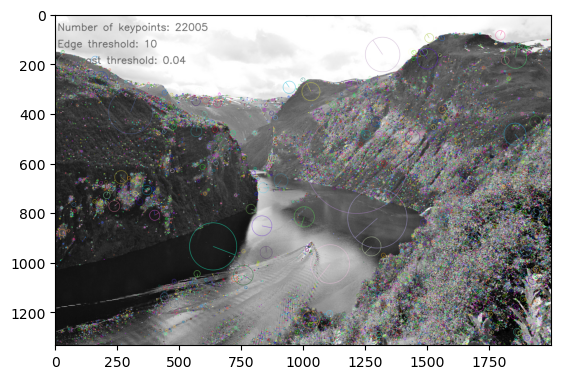

In [7]:
image_name = "fjords"
image_extension = ".jpg"
kp_img = create_keypoints_image(images_path + image_name + image_extension)
# save image
cv.imwrite(images_path + image_name + "_sift_keypoints.jpg", kp_img)

# display created image
plt.imshow(kp_img)

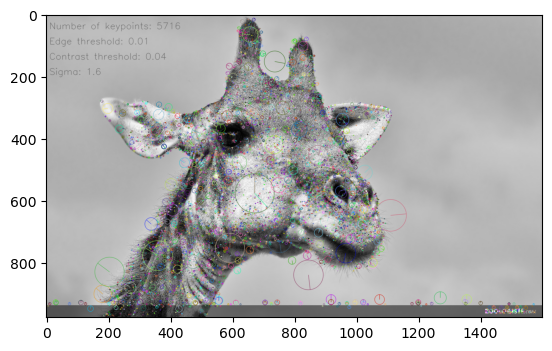

In [8]:
image_name = "girafe"
image_extension = ".jpg"
kp_img = create_keypoints_image(
    images_path + image_name + image_extension, edgeTreshold=0.01
)
# save image
cv.imwrite(images_path + image_name + "_sift_keypoints.jpg", kp_img)

# display created image
plt.imshow(kp_img)

Draw basic geometric shapes


True

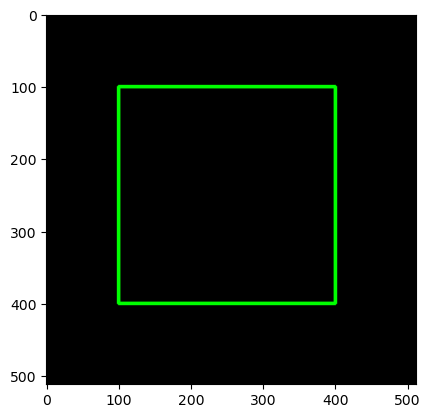

In [9]:
img = np.zeros((512, 512, 3), np.uint8)
# centered rectangle
img = cv.rectangle(img, (100, 100), (400, 400), (0, 255, 0), 3)

# display created image
plt.imshow(img)

cv.imwrite(images_path + "rect.jpg", img)

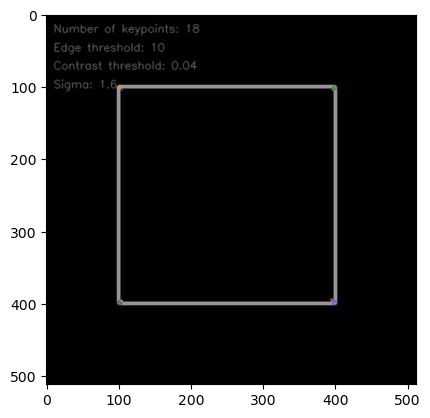

In [10]:
image_name = "rect"
image_extension = ".jpg"
img = create_keypoints_image(images_path + image_name + image_extension, big_only=True)
# save image
cv.imwrite(images_path + image_name + "_sift_keypoints.jpg", img)

plt.imshow(img)

True

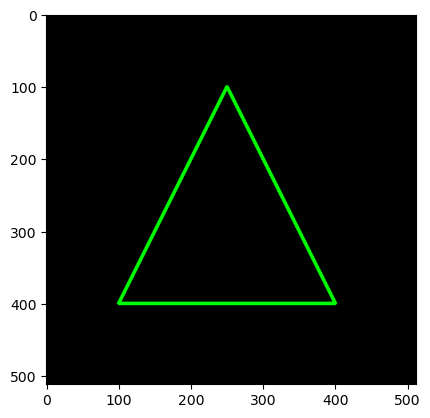

In [11]:
img = np.zeros((512, 512, 3), np.uint8)
# centered triangle
img = cv.line(img, (100, 400), (400, 400), (0, 255, 0), 3)
img = cv.line(img, (100, 400), (250, 100), (0, 255, 0), 3)
img = cv.line(img, (250, 100), (400, 400), (0, 255, 0), 3)


# display created image
plt.imshow(img)

cv.imwrite(images_path + "triangle.jpg", img)

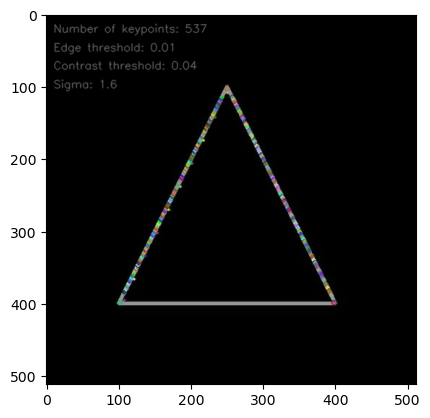

In [12]:
image_name = "triangle"
image_extension = ".jpg"
img = create_keypoints_image(
    images_path + image_name + image_extension, edgeTreshold=0.01, big_only=True
)
# save image
cv.imwrite(images_path + image_name + "_sift_keypoints2.jpg", img)

plt.imshow(img)

True

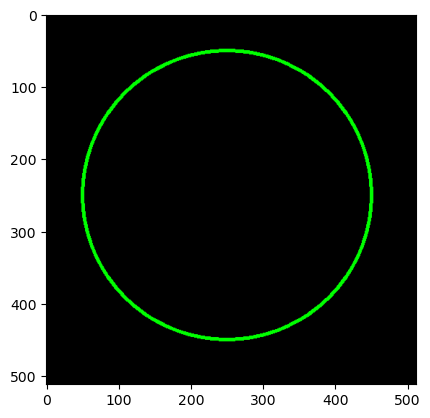

In [13]:
img = np.zeros((512, 512, 3), np.uint8)
# centered circle
img = cv.circle(img, (250, 250), 200, (0, 255, 0), 3)


# display created image
plt.imshow(img)

cv.imwrite(images_path + "circle.jpg", img)

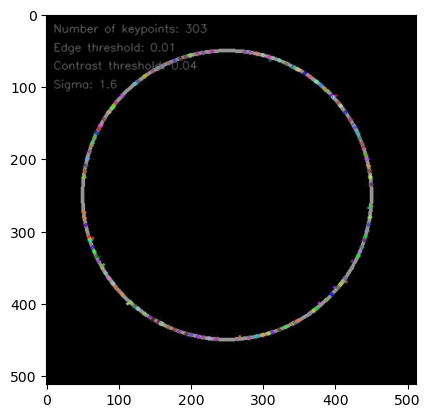

In [14]:
image_name = "circle"
image_extension = ".jpg"
img = create_keypoints_image(
    images_path + image_name + image_extension, edgeTreshold=0.01, big_only=True
)
# save image
cv.imwrite(images_path + image_name + "_sift_keypoints2.jpg", img)

plt.imshow(img)

True

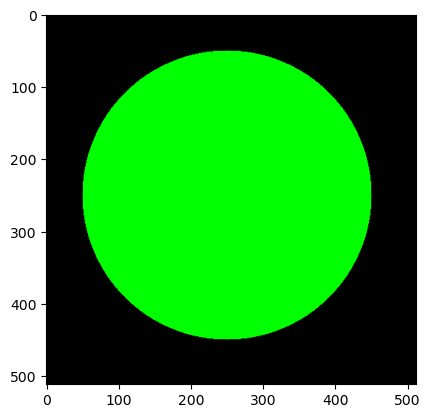

In [15]:
img = np.zeros((512, 512, 3), np.uint8)
# centered disk
img = cv.circle(img, (250, 250), 200, (0, 255, 0), -1)


# display created image
plt.imshow(img)

cv.imwrite(images_path + "disk.jpg", img)

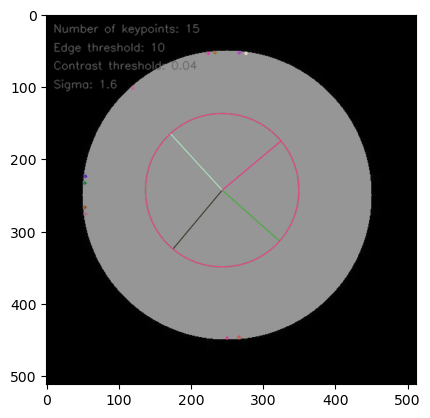

In [16]:
image_name = "disk"
image_extension = ".jpg"
img = create_keypoints_image(
    images_path + image_name + image_extension, edgeTreshold=10, big_only=True
)
# save image
cv.imwrite(images_path + image_name + "_sift_keypoints.jpg", img)

plt.imshow(img)

### SIFT Features Matching


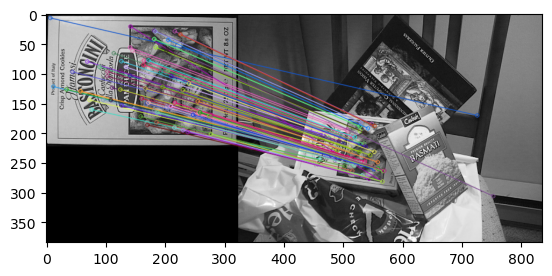

True

In [17]:
img1 = cv.imread(images_path + "box.png", cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread(images_path + "box_in_scene.png", cv.IMREAD_GRAYSCALE)  # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.imshow(img3), plt.show()

cv.imwrite(images_path + "box_matchesSIFT_BF.jpg", img3)

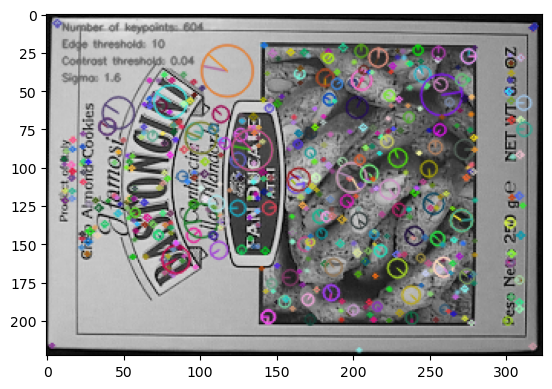

In [18]:
image_name = "box"
image_extension = ".png"
kp_img = create_keypoints_image(images_path + image_name + image_extension)

# display created image
plt.imshow(kp_img)

### Tests de SIFT sur Images Aquatiques


In [6]:
aqua_image_path = "images/aqua_images/"

image_name = "87_img_"
image_extension = ".png"

kp_img = create_keypoints_image(aqua_image_path + image_name + image_extension)

# plot image
plt.imshow(kp_img)

# save image
cv.imwrite(aqua_image_path + image_name + "_sift_keypoints.jpg", kp_img)

NameError: name 'create_keypoints_image' is not defined

# Discover Python SIFT Implementation


Comparison with Python implementation `PySIFT`

Following takes 3'30"


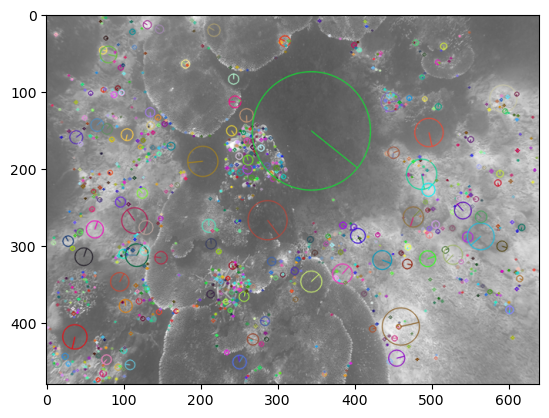

In [7]:
img = cv.imread(aqua_image_path + image_name + image_extension, 0)  # load as grayscale

# # compute SIFT keypoints and descriptors
# kp, des = pysift.computeKeypointsAndDescriptors(img)

# # draw keypoints
# kp_img = cv.drawKeypoints(img, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# # plot image
# plt.imshow(kp_img)

In [8]:
# save image
cv.imwrite(aqua_image_path + image_name + "_sift_keypoints_python.jpg", kp_img)

True

Display Pysift Extrema


In [9]:
aqua_image_path = "images/aqua_images/"

image_name = "87_img_"
image_extension = ".png"

img = cv.imread(aqua_image_path + image_name + image_extension, 0)

# parameters
sigma = 1.6
num_intervals = 3
assumed_blur = 0.5
image_border_width = 5

keypoints = visu_extrema.compute_fitted_extrema(
    img, sigma, num_intervals, assumed_blur, image_border_width
)

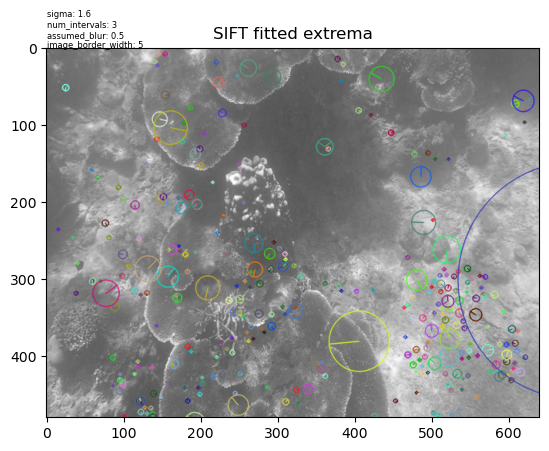

In [11]:
kp_img = cv.drawKeypoints(
    img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# plot image with title, and information about parameters
plt.title("SIFT fitted extrema")
# add text with pyplot
plt.text(
    0,
    0,
    "sigma: "
    + str(sigma)
    + "\n"
    + "num_intervals: "
    + str(num_intervals)
    + "\n"
    + "assumed_blur: "
    + str(assumed_blur)
    + "\n"
    + "image_border_width: "
    + str(image_border_width),
    fontsize=6,
)

plt.imshow(kp_img)

In [12]:
# save image
cv.imwrite(images_path + image_name + "_sift_fitted_extrema.jpg", kp_img)

True

Plot raw extrema, ie before quadratic fit


In [4]:
aqua_image_path = "images/aqua_images/"

image_name = "87_img_"
image_extension = ".png"

img = cv.imread(aqua_image_path + image_name + image_extension, 0)

# parameters
sigma = 1.6
num_intervals = 3
assumed_blur = 0.5
image_border_width = 5

keypoints = visu_extrema.compute_raw_extrema(
    img, sigma, num_intervals, assumed_blur, image_border_width
)

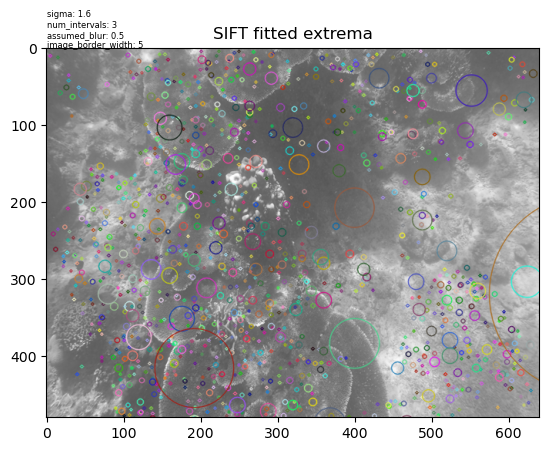

In [5]:
kp_img = cv.drawKeypoints(
    img, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# plot image with title, and information about parameters
plt.title("SIFT fitted extrema")
# add text with pyplot
plt.text(
    0,
    0,
    "sigma: "
    + str(sigma)
    + "\n"
    + "num_intervals: "
    + str(num_intervals)
    + "\n"
    + "assumed_blur: "
    + str(assumed_blur)
    + "\n"
    + "image_border_width: "
    + str(image_border_width),
    fontsize=6,
)

plt.imshow(kp_img)

In [6]:
# save image
cv.imwrite(images_path + image_name + "_sift_raw_extrema.jpg", kp_img)

True

Look at DoG


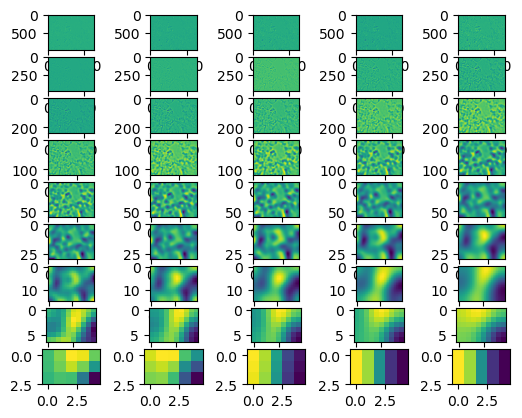

In [5]:
aqua_image_path = "images/aqua_images/"

image_name = "87_img_"
image_extension = ".png"

img = cv.imread(aqua_image_path + image_name + image_extension, 0)

# plt.imshow(img)

dogs = dog.visualize_DoG(img, sigma=1.6, num_intervals=3, assumed_blur=0.5)

# SURF Overview


SURF is patented in OpenCV, therefore unusable.


In [ ]:
image_name = "girafe"
image_extension = ".jpg"

# img = cv.imread(images_path + image_name + image_extension)

# # Create SURF object. You can specify params here or later.
# # Here I set Hessian Threshold to 400
# surf = cv.xfeatures2d.SURF_create(400)

# # Find keypoints and descriptors directly
# kp, des = surf.detectAndCompute(img, None)

# len(kp)

error: OpenCV(4.6.0) C:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\opencv_contrib-4.6.0\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'
